<a href="https://colab.research.google.com/github/wmendozaFS/Machine_Learning/blob/main/12ED02_1_Ejercicio_Dirigido_Regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

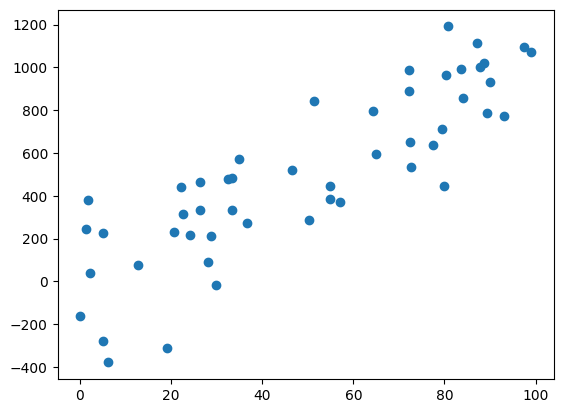

In [1]:
import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

# Generador de distribución de datos para regresión lineal simple
def generador_datos_simple(beta, muestras, desviacion):
    # Genero n (muestras) valores de x aleatorios entre 0 y 100
    x = np.random.random(muestras) * 100
    # Genero un error aleatorio gaussiano con desviación típica (desviacion)
    e = np.random.randn(muestras) * desviacion
    # Obtengo el y real como x*beta + error
    y = x * beta + e
    return x.reshape((muestras,1)), y.reshape((muestras,1))

# Parámetros de la distribución
desviacion = 200
beta = 10
n = 50
x, y = generador_datos_simple(beta, n, desviacion)

# Represento los datos generados
plt.scatter(x, y)
plt.show()


In [2]:
# Creo un modelo de regresión lineal
modelo = linear_model.LinearRegression()

# Entreno el modelo con los datos (X,Y)
modelo.fit(x, y)
# Ahora puedo obtener el coeficiente b_1
print (u'Coeficiente beta1: ', modelo.coef_[0])

# Podemos predecir usando el modelo
y_pred = modelo.predict(x)

# Por último, calculamos el error cuadrático medio y el estadístico R^2
print (u'Error cuadrático medio: %.2f' % mean_squared_error(y, y_pred))
print (u'Estadístico R_2: %.2f' % r2_score(y, y_pred))


Coeficiente beta1:  [10.81856983]
Error cuadrático medio: 40218.87
Estadístico R_2: 0.74


"Coeficiente beta1" se refiere al coeficiente de la variable independiente en el modelo de regresión lineal. En este caso, el coeficiente beta1 tiene un valor de 9.49407301. Esto significa que, en el modelo de regresión lineal, por cada unidad de cambio en la variable independiente, se espera un aumento de aproximadamente 9.49407301 en la variable dependiente.

"Error cuadrático medio" se refiere al error cuadrático medio (MSE) del modelo de regresión. El MSE representa la diferencia promedio entre los valores observados y los valores predichos por el modelo. En este caso, el valor del MSE es 28847.59, lo que indica que, en promedio, el modelo tiene un error cuadrático medio de 28847.59.

"Estadístico R_2" se refiere al coeficiente de determinación (R^2), que indica la proporción de la varianza en la variable dependiente que puede ser explicada por el modelo de regresión. Este valor oscila entre 0 y 1, donde 1 indica un ajuste perfecto. En este caso, el valor es 0.72, lo que significa que el modelo explica aproximadamente el 72% de la varianza en la variable dependiente. Esto indica que el modelo tiene un buen ajuste a los datos, explicando una cantidad considerable de la variabilidad observada en la variable dependiente.

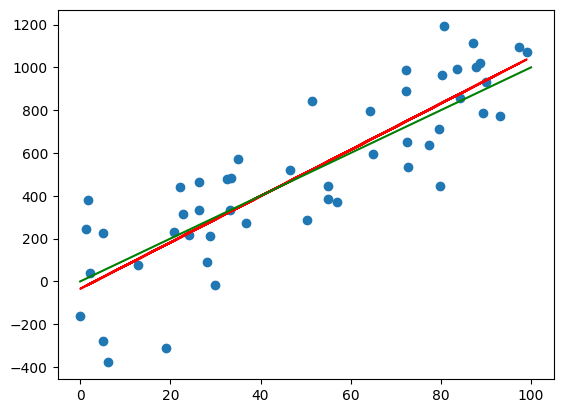

In [3]:
# Representamos el ajuste (rojo) y la recta Y = beta*x (verde)
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
x_real = np.array([0, 100])
y_real = x_real*beta
plt.plot(x_real, y_real, color='green')
plt.show()



## Regresión lineal múltiple

In [4]:
import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

def generador_datos_multiple(coeficientes, muestras, std_dev):
    # Calculamos el número de predictores y creamos una matriz
    # con los coeficientes con p filas y 1 columna para
    # multiplicación de matrices
    n_coeficientes = len(coeficientes)
    coef_matriz = np.array(coeficientes).reshape(n_coeficientes, 1)
    # Igual que en el caso de regresión lineal simple
    x = np.random.random_sample((muestras, n_coeficientes)) * 100
    epsilon = np.random.randn(muestras) * std_dev
    # Como x es una matriz muestras x n_coeficientes, y
    # coef_matriz es n_coeficientes x 1
    # Podemos hacer multiplicación de matrices para obtener y
    # dados x1,x2,...,xn necesitamos hacer la transpuesta
    # para obtener un array 1xmuestras en lugar de muestrasx1 para
    # usar la regresión
    y = np.matmul(x, coef_matriz).transpose() + epsilon
    return x, y

# Genero los datos que ajustaré con la recta
coeficientes_reales =[10, 5]
muestras = 200
std_dev = 100

X, Y = generador_datos_multiple(coeficientes_reales, muestras, std_dev)

# Creo un modelo de regresión lineal
modelo = linear_model.LinearRegression()

# Entreno el modelo con los datos (X,Y)
modelo.fit(X, Y.transpose())
# Ahora puedo obtener el coeficiente b_1
print (u'Coeficiente beta1: ', modelo.coef_[0])

# Podemos predecir usando el modelo
y_pred = modelo.predict(X)

# Por último, calculamos el error cuadrático medio y el estadístico R^2
print (u'Error cuadrático medio: %.2f' \
        % mean_squared_error(Y.transpose(), y_pred))
print (u'Estadístico R_2: %.2f' % r2_score(Y.transpose(), y_pred))

Coeficiente beta1:  [9.60658747 5.2134821 ]
Error cuadrático medio: 7988.19
Estadístico R_2: 0.92


Text(0, 0.5, 'X')

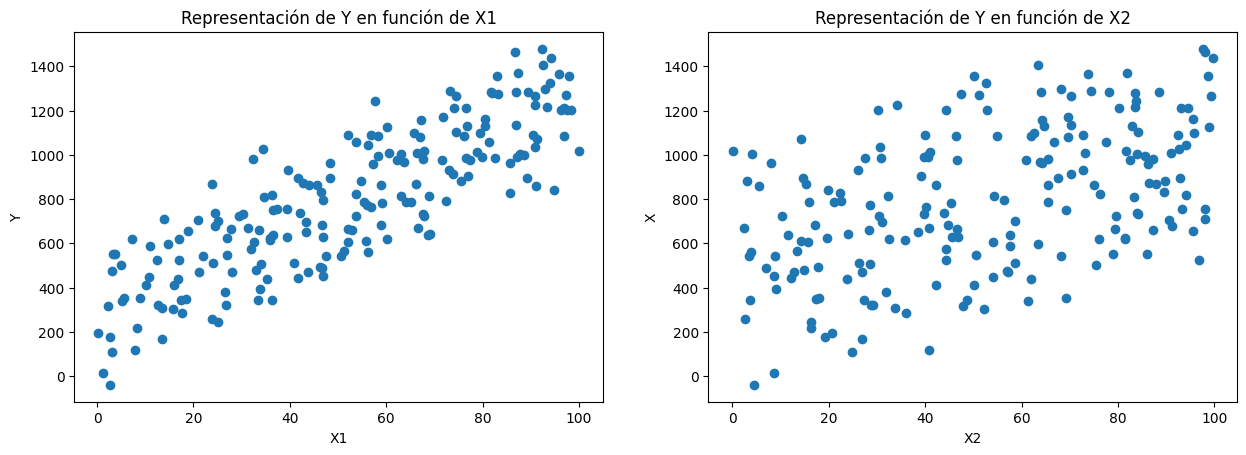

In [5]:
f, [p1, p2] = plt.subplots(1,2)
f.set_figwidth(15)

# Represento los puntos para la variable X1 y para Y
p1.scatter(X[:,0], Y)
p1.set_title(u'Representación de Y en función de X1')
p1.set_xlabel('X1')
p1.set_ylabel('Y')

p2.scatter(X[:,1], Y)
p2.set_title(u'Representación de Y en función de X2')
p2.set_xlabel('X2')
p2.set_ylabel('X')



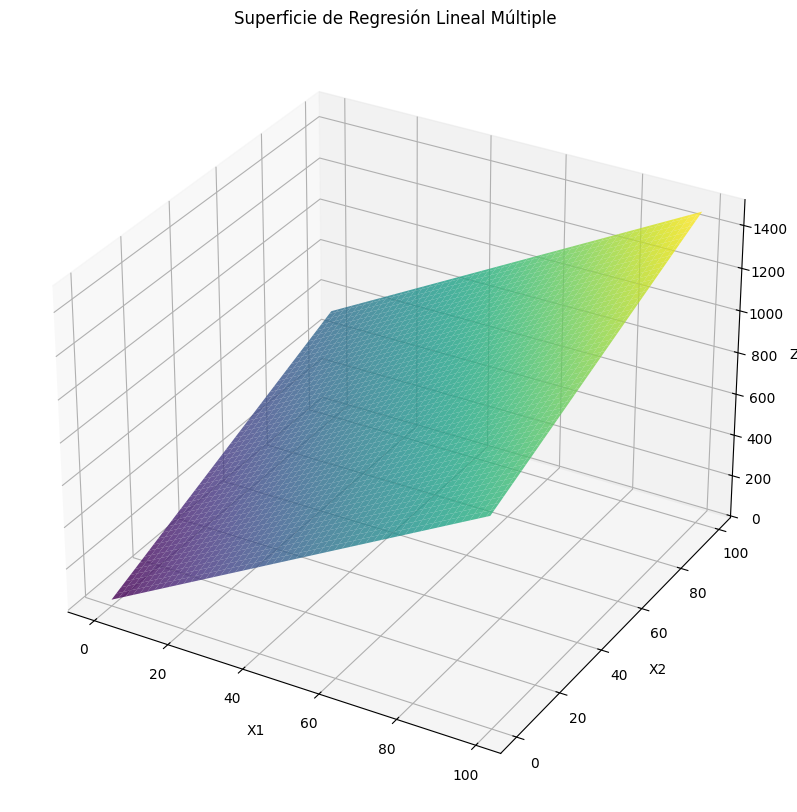

In [10]:
import matplotlib.pyplot as plt
import numpy as np
# Suponiendo que 'modelo' ya está definido y tiene 'coef_'
# Por ejemplo, de un modelo de scikit-learn
# from sklearn.linear_model import LinearRegression
# modelo = LinearRegression()
# X = np.random.rand(100, 2) * 100
# y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100) * 10
# modelo.fit(X, y)

# Creo la figura
fig = plt.figure(figsize=(15, 10))

# Añado los ejes 3D usando add_subplot
p3 = fig.add_subplot(111, projection='3d') # 111 significa 1 fila, 1 columna, primer subplot

# Defino los datos para la superficie
x1, x2 = np.meshgrid(range(100), range(100))

# Superficie que se obtiene con la regresión lineal múltiple
# Asegúrate de que 'modelo.coef_' y 'modelo.intercept_' existan y tengan la forma correcta
# modelo.coef_ es un array de arrays, por eso el [0][0] y [0][1]
# Si tu modelo.coef_ es simplemente un array 1D (ej. [val1, val2]), usa modelo.coef_[0] y modelo.coef_[1]
z_modelo = modelo.coef_[0][0] * x1 + modelo.coef_[0][1] * x2 + modelo.intercept_ # Añadir el intercepto es importante

# Graficar la superficie
p3.plot_surface(x1, x2, z_modelo, cmap='viridis', alpha=0.8)

# Añadir etiquetas
p3.set_xlabel('X1')
p3.set_ylabel('X2')
p3.set_zlabel('Y')
p3.set_title('Superficie de Regresión Lineal Múltiple')

plt.show()

In [11]:
# Represento la superficie que ajusta mejor a los datos
p3 = plt.figure(figsize=(15,10)).gca(projection='3d')
x1, x2 = np.meshgrid(range(100), range(100))
# Superficie que se obtiene con la regresión lineal múltiple
z_modelo = modelo.coef_[0][0]*x1 + modelo.coef_[0][1]*x2
# Superficie real de los datos
z_real = coeficientes_reales[0]*x1 + coeficientes_reales[1]*x2
# Represento ambas superficies
p3.plot_surface(x1, x2, z_modelo, alpha=0.3, color='green')
p3.plot_surface(x1, x2, z_real, alpha=0.3, color='yellow')
# Represento también los datos para ver el ajuste
p3.scatter(X[:,0], X[:,1], Y)
p3.set_title(u'Regresión lineal usando dos variables \
              (X1,X2) para predecir Y')
p3.set_xlabel('Eje X1')
p3.set_ylabel('Eje X2')
p3.set_zlabel('Eje Y')
p3.view_init(10, )
plt.show()

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 1500x1000 with 0 Axes>